In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("2018.csv",index_col="date",parse_dates=[0])
data

,speed
date,
2018-01-01 00:00:00,43.707252
2018-01-01 01:00:00,47.648155
2018-01-01 02:00:00,49.137566
2018-01-01 03:00:00,50.626977
2018-01-01 04:00:00,48.740828
...,...
2018-12-31 19:00:00,28.286751
2018-12-31 20:00:00,40.594183
2018-12-31 21:00:00,40.594183


In [5]:
data.describe()

,speed
count,8760.000000
mean,32.975282
std,12.863534
min,2.573417
25%,20.432744
50%,35.988012
75%,45.335295
max,52.207573


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


Text(0, 0.5, 'Hourly Driving speed')

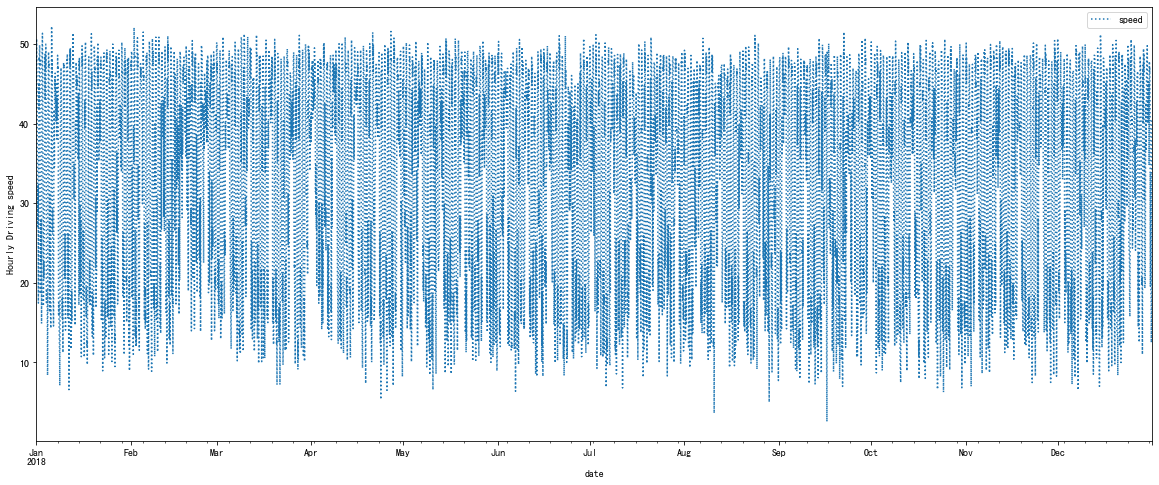

In [7]:
# use pandas internal drawing function for visualizetion
data.plot(style=[':','--','-'], figsize=(20,8))
plt.ylabel('Hourly Driving speed')
# density is too large, cannot discover the common

Text(0, 0.5, 'Hourly Driving speed')

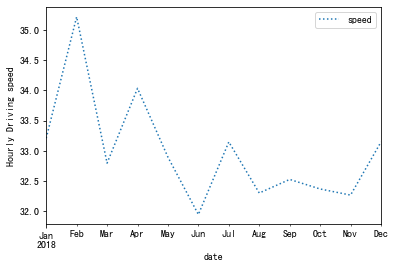

In [8]:
weekly = data.resample('m').mean()
weekly.plot(style=[':',"--",'-'])
plt.ylabel('Hourly Driving speed')

Text(0, 0.5, 'mean of 30 days')

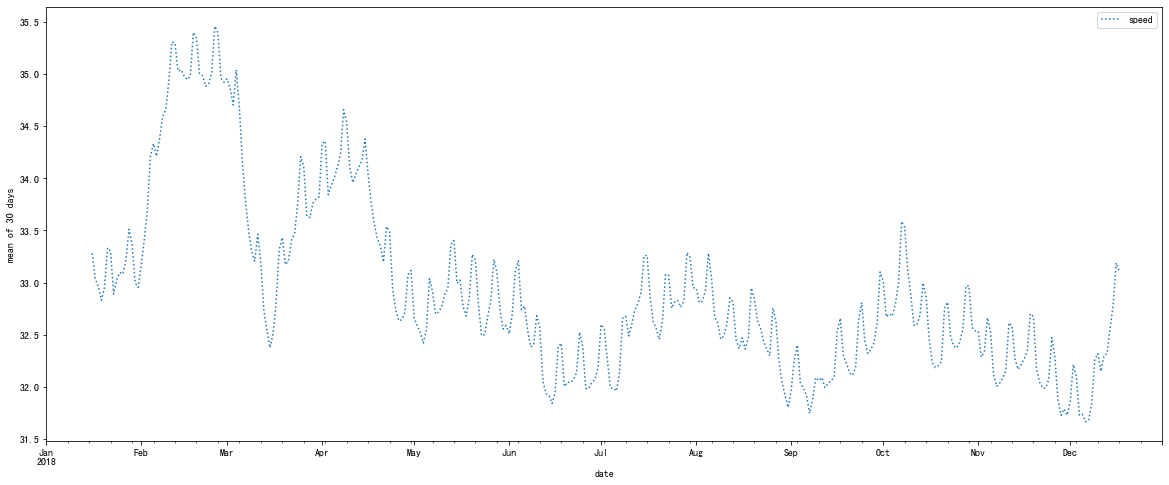

In [9]:
daily = data.resample('d').mean()
daily.rolling(30,center=True).mean().plot(style=[':',"--",'-'], figsize=(20,8))
plt.ylabel('mean of 30 days')

Text(0, 0.5, 'mean of hours')

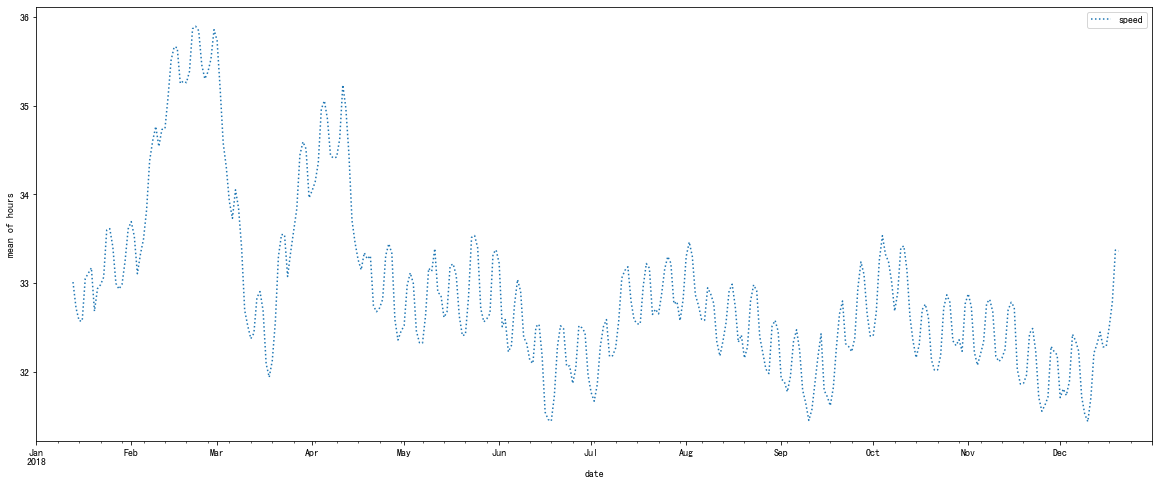

In [10]:
hourly = data.resample('h')
daily.rolling(24,center=True).mean().plot(style=[':',"--",'-'],figsize=(20,8))
plt.ylabel('mean of hours')

In [11]:
data.index.date

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 1), ..., datetime.date(2018, 12, 31),
       datetime.date(2018, 12, 31), datetime.date(2018, 12, 31)],
      dtype=object)

In [12]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

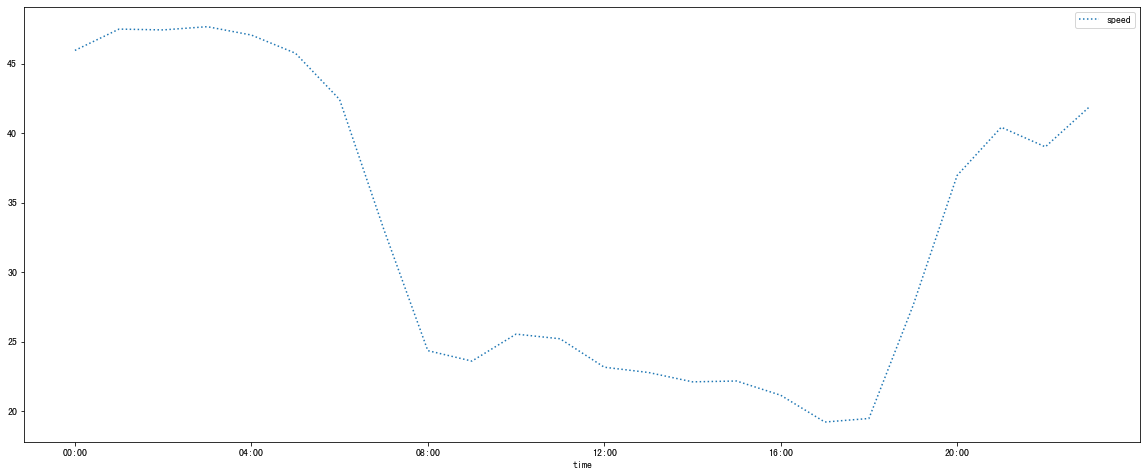

In [13]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':',"--",'-'],figsize=(20,8))

          speed
date           
0     32.320741
1     31.315719
2     30.388194
3     30.628550
4     30.195837
5     33.859018
6     42.131500


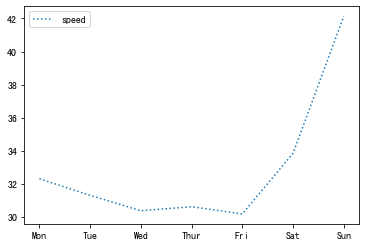

In [14]:
by_weekday = data.groupby(data.index.dayofweek).mean()
print(by_weekday)
by_weekday.index=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
by_weekday.plot(style=[':',"--",'-'])

In [15]:
data.index.weekday.unique()

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='date')

In [16]:
weekend = np.where(data.index.weekday<5,'weekday','weekend')
weekend

array(['weekday', 'weekday', 'weekday', ..., 'weekday', 'weekday',
       'weekday'], dtype='<U7')

In [17]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

speed
weekday 00:00:00  46.573617
        01:00:00  47.753955
        02:00:00  47.492438
        03:00:00  47.626226
        04:00:00  46.889193
        05:00:00  45.368796
        06:00:00  41.114738
        07:00:00  29.588523
        08:00:00  19.325411
        09:00:00  19.420204
        10:00:00  22.427557
        11:00:00  22.273043
        12:00:00  19.984715
        13:00:00  19.881158
        14:00:00  18.835238
        15:00:00  18.778329
        16:00:00  17.453137
        17:00:00  14.678425
        18:00:00  15.111850
        19:00:00  23.897433
        20:00:00  35.535661
        21:00:00  41.263649
        22:00:00  39.650802
        23:00:00  42.475521
weekend 00:00:00  44.407292
        01:00:00  46.828866
        02:00:00  47.278954
        03:00:00  47.757598
        04:00:00  47.497587
        05:00:00  46.715869
        06:00:00  45.711182
        07:00:00  41.905435
        08:00:00  36.940941
        09:00:00  34.059073
        10:00:00  33.328871
        11:00:00  32.537111
        12:00:00  31.098214
        13:00:00  30.031084
        14:00:00  30.286930
        15:00:00  30.640718
        16:00:00  30.373244
        17:00:00  30.566387
        18:00:00  30.375427
        19:00:00  36.842845
        20:00:00  40.521164
        21:00:00  38.316313
        22:00:00  37.416119
        23:00:00  40.448994

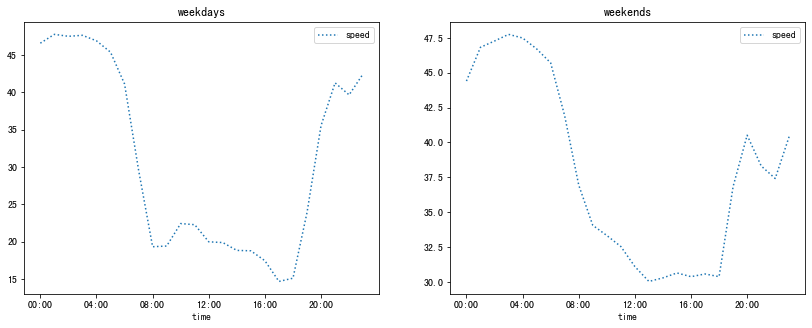

In [18]:
figsize, ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['weekday',:].plot(ax=ax[0],title='weekdays',
                             xticks=hourly_ticks, style=[':',"--",'-'])
by_time.loc['weekend',:].plot(ax=ax[1],title='weekends',
                             xticks=hourly_ticks, style=[':',"--",'-'])